In [1]:
# Name : Priyanka Naik - 50248591

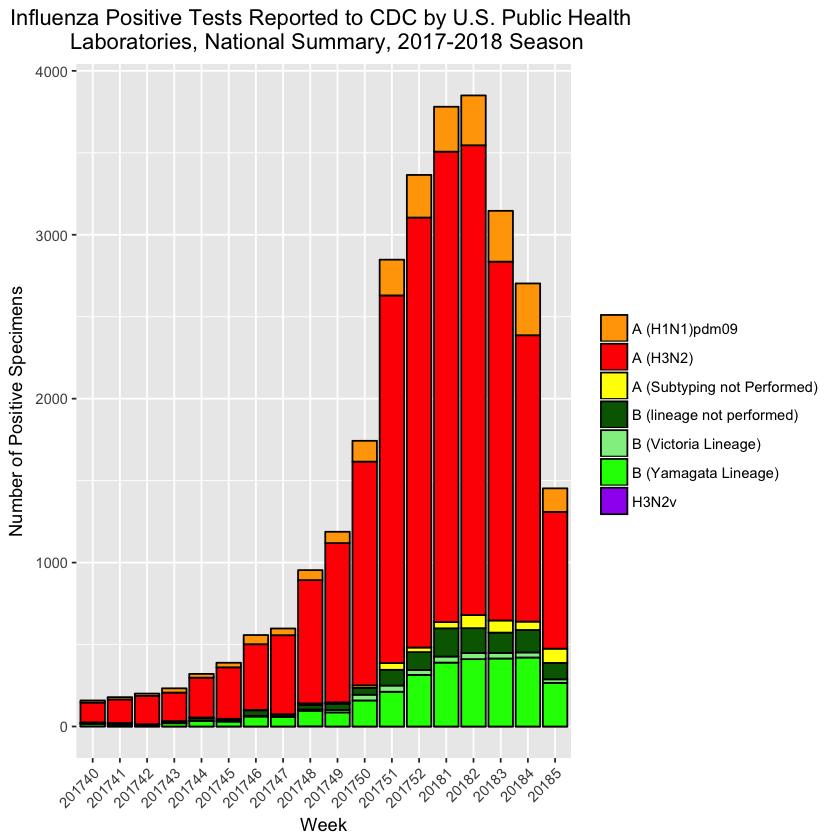

In [2]:
#Positive Tested Graph

library(ggplot2)
library(reshape2)
positive_tested <- read.csv("Part2Data/PositiveTested.csv", skip=1)
#positive_tested
dfm <- melt(positive_tested[,c('WEEK','A..2009.H1N1.','A..H3.', 'A..Subtyping.not.Performed.', 'B', 'BVic', 'BYam', 'H3N2v')],id.vars = "WEEK")
dfm$WEEK <- paste(positive_tested$YEAR, positive_tested$WEEK, sep="")
#dfm
ggplot(dfm, aes(x = paste(WEEK), y = value, fill = variable)) + 
geom_bar(stat = "identity", position="stack", color="black") +
xlab("Week") +
ylab("Number of Positive Specimens") +
labs(title = "Influenza Positive Tests Reported to CDC by U.S. Public Health \n Laboratories, National Summary, 2017-2018 Season") + 
theme(plot.title = element_text(hjust = 0.5)) + 
theme(plot.subtitle = element_text(hjust = 0.5)) + 
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
theme(legend.title = element_blank()) +
scale_fill_manual(name = "", labels = c("A..2009.H1N1." = "A (H1N1)pdm09", "A..H3." = "A (H3N2)", "A..Subtyping.not.Performed." = "A (Subtyping not Performed)", "B" = "B (lineage not performed)", "BVic"= "B (Victoria Lineage)", "BYam"= "B (Yamagata Lineage)", "H3N2v"="H3N2v"), values = c("A..2009.H1N1." = "orange", "A..H3." = "red", "A..Subtyping.not.Performed." = "yellow", "B" = "darkgreen", "BVic"= "lightgreen", "BYam"= "green", "H3N2v"="purple"))

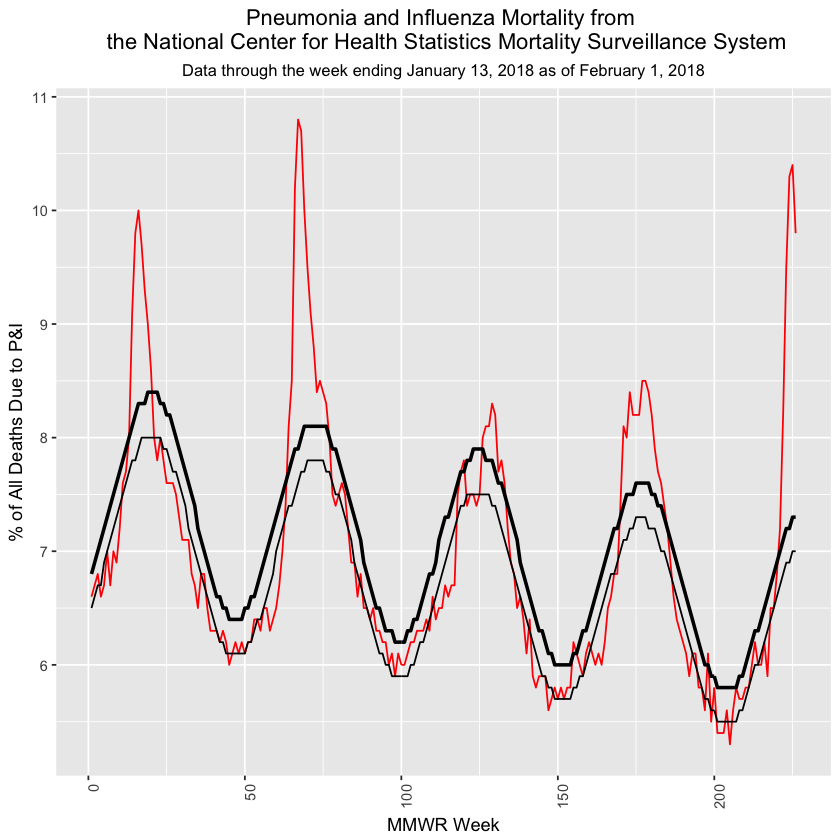

In [1]:
#P&I Mortality Graph

library(ggplot2)
mortality_deaths <- read.csv("Part2Data/National_2013-18_Data.csv")

df_mortality <- data.frame(week = mortality_deaths$WEEK, season=mortality_deaths$SEASON, percent = mortality_deaths$PERCENT.P.I, baseline=mortality_deaths$BASELINE, threshold=mortality_deaths$THRESHOLD)

ggplot(df_mortality, aes(x = 1:length(week), group = 1)) + 
geom_line(aes(y = percent, color="percent")) +
geom_line(aes(y = baseline, color="baseline")) +
geom_line(aes(y = threshold, color="threshold"), size=1) +
scale_colour_manual(name='', values=c('percent'='red', 'baseline'='black', 'threshold'='black')) +
xlab("MMWR Week") +
ylab("% of All Deaths Due to P&I") +
labs(title = "Pneumonia and Influenza Mortality from \n the National Center for Health Statistics Mortality Surveillance System", subtitle="Data through the week ending January 13, 2018 as of February 1, 2018") + 
theme(plot.title = element_text(hjust = 0.5)) + 
theme(plot.subtitle = element_text(hjust = 0.5)) + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
guides(color=FALSE)
#axis(side=1, at=yahoo2$date[ at ], labels=format(yahoo2$date[at], '%b-%y'))

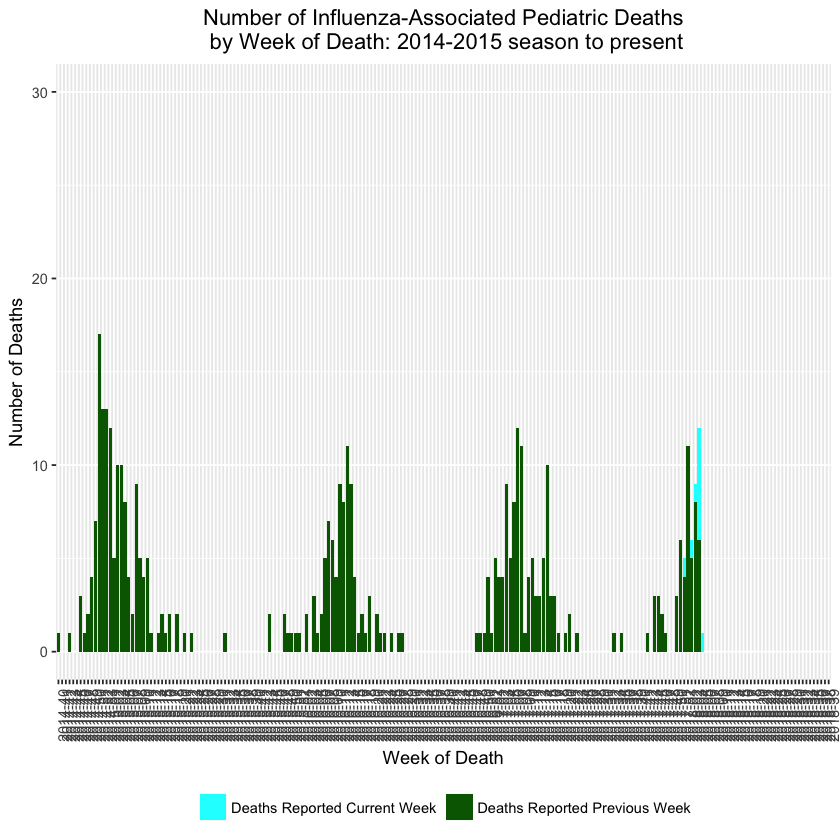

In [4]:
# Pediatric Deaths Graph

library(ggplot2)
library(scales)
pediatric_deaths <- read.csv("Part2Data/PediatricDeath1.csv")
currentDF <- data.frame(weeks=pediatric_deaths$WEEK.NUMBER, deaths=pediatric_deaths$CURRENT.WEEK.DEATHS, cat="Deaths Reported Current Week")

previousDF <- data.frame(weeks=pediatric_deaths$WEEK.NUMBER, deaths=pediatric_deaths$PREVIOUS.WEEKS.DEATHS, cat="Deaths Reported Previous Week")

df <- rbind(currentDF, previousDF)

ggplot(df, aes(x = weeks, y = deaths, group=cat, fill=cat)) + 
geom_bar(stat="identity") + 
xlab("Week of Death") + 
ylab("Number of Deaths") + 
labs(title = "Number of Influenza-Associated Pediatric Deaths\n by Week of Death: 2014-2015 season to present") + 
theme(plot.title = element_text(hjust = 0.5)) + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
coord_cartesian(ylim = c(0, 30)) +
scale_color_discrete(name="Week") +
theme(legend.position="bottom") +
scale_fill_manual(name = "", values = c("Deaths Reported Current Week" = "cyan", "Deaths Reported Previous Week" = "darkgreen"))

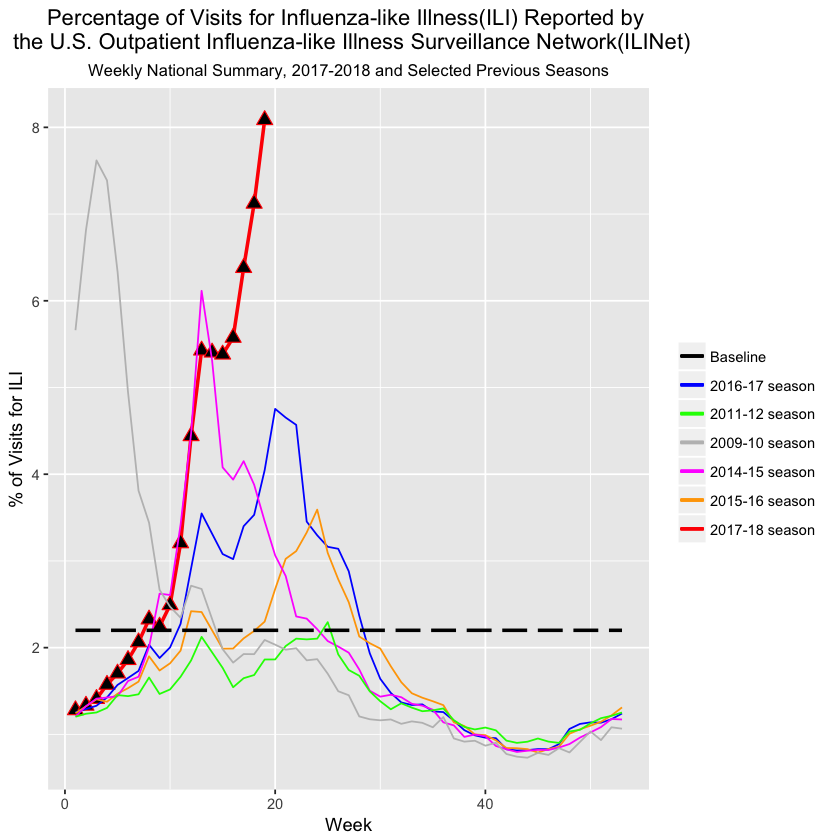

In [5]:
#Influenza-like Illness Graph

library(ggplot2)
library(scales)

illness <- read.csv("Part2Data/Influenza-likeIllness.csv")

week = illness$Week

x1 <- c(illness$X2017.18[13], illness$X2017.18[15])
illness$X2017.18[14] <- mean(x1)

x2 <- c(illness$X2016.17[13], illness$X2016.17[15])
illness$X2016.17[14] <- mean(x2)

x3 <- c(illness$X2015.16[13], illness$X2015.16[15])
illness$X2015.16[14] <- mean(x3)

x4 <- c(illness$X2011.12[13], illness$X2011.12[15])
illness$X2011.12[14] <- mean(x4)

x5 <- c(illness$X2009.10[13], illness$X2009.10[15])
illness$X2009.10[14] <- mean(x5)

ggplot(data = illness, aes(x=1:length(Week), group=1)) + 
geom_line(aes(y=X2017.18, color="red"), size=1, na.rm = TRUE, show.legend=TRUE) + 
geom_point(aes(y=X2017.18), color="red", size=3, shape=24, fill="black", na.rm = TRUE) +
geom_line(aes(y=X2016.17, color="blue"), size=0.5, na.rm = TRUE) + 
geom_line(aes(y=X2015.16, color="orange"), size=0.5, na.rm = TRUE) + 
geom_line(aes(y=X2014.15, color="magenta"), size=0.5) + 
geom_line(aes(y=X2011.12, color="green"), size=0.5, na.rm = TRUE) + 
geom_line(aes(y=X2009.10, color="grey"), na.rm = TRUE) + 
geom_line(aes(y=Baseline, color="black"), size=1, na.rm = TRUE, linetype="longdash") +
labs(x = 'Week', y = '% of Visits for ILI', title = "Percentage of Visits for Influenza-like Illness(ILI) Reported by \n the U.S. Outpatient Influenza-like Illness Surveillance Network(ILINet)", subtitle="Weekly National Summary, 2017-2018 and Selected Previous Seasons") +
theme(plot.title = element_text(hjust = 0.5)) + 
theme(plot.subtitle = element_text(hjust = 0.5)) +
theme(legend.title=element_blank()) +
scale_colour_manual(labels=c("red"="2017-18 season", "blue"="2016-17 season", "orange"="2015-16 season", "magenta"="2014-15 season", "green"="2011-12 season", "grey"="2009-10 season", "black"="Baseline"), values=c("red"="red", "blue"="blue", "orange"="orange", "magenta"="magenta", "green"="green", "grey"="grey", "black"="black"))

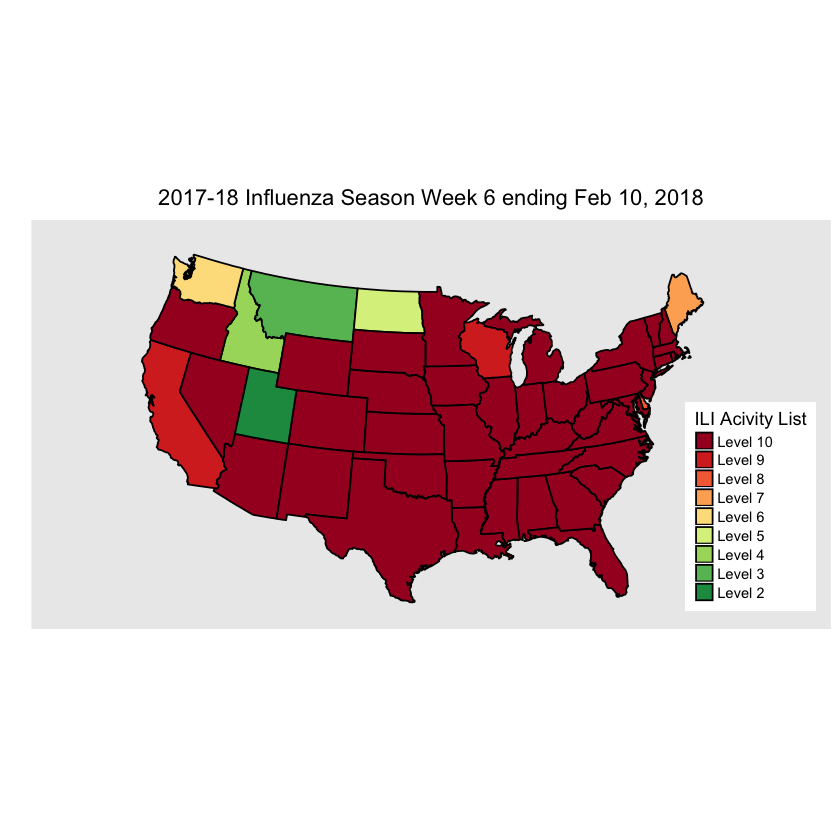

In [33]:
# Flu Heat Map

library("ggmap")
library("maptools")
library(maps)
library(RColorBrewer)
flu <- read.csv("Part2Data/FluHeatMap.csv")

all_states <- map_data("state")

df <- data.frame(state = tolower(flu$STATENAME), level_label = flu$ACTIVITY.LEVEL.LABEL, level = flu$ACTIVITY.LEVEL)

heat_colors <- brewer.pal(10, name="RdYlGn")

df$level <- as.numeric(substr(flu$ACTIVITY.LEVEL, 6, 8))
levels <- sort(unique(df$level), decreasing = TRUE)

#levels = NULL
#for(i in 0:10) {
#    levels = append(levels, paste("Level", i, sep=" "))
#}

level_color <- data.frame(level=rev(levels), heat_colors=heat_colors)

df1 <- merge(df, level_color, by="level", all.x=TRUE)

df1$region <- df1$state

Total <- merge(all_states, df1, by="region")

levels_label <- c("Level 10", "Level 9", "Level 8", "Level 7", "Level 6", "Level 5", "Level 4", "Level 3", "Level 2", "Level 1", "Level 0")

ggplot(data=Total, aes(x=long, y=lat, group=group)) +
geom_polygon(aes(fill=heat_colors), color="black") +
scale_x_continuous(breaks = NULL) + 
scale_y_continuous(breaks = NULL) +
labs(x = "", y = "") +
labs(title = "2017-18 Influenza Season Week 6 ending Feb 10, 2018") +
coord_map("albers", lat0 = 39, lat1 = 45) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(legend.position=c("0.9", "0.3"), legend.title=element_text(size=rel(1)), legend.text=element_text(size=rel(0.8)), legend.key.size = unit(0.4, "cm")) +
scale_fill_manual(name = "ILI Acivity List", values = heat_colors, labels = levels_label)